In [7]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [8]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [9]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
Store,0,0.0
Dept,0,0.0
Date,0,0.0
Weekly_Sales,0,0.0
IsHoliday,0,0.0


In [11]:
data['Date']=pd.to_datetime(data['Date'])

In [12]:
copy_data=data.copy()

In [13]:
copy_data.index=(copy_data.Date)

In [14]:
ts=copy_data[copy_data.Store==1]

In [15]:
ts

,Store,Dept,Date,Weekly_Sales,IsHoliday
Date,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False
2010-02-12,1,1,2010-02-12,46039.49,True
2010-02-19,1,1,2010-02-19,41595.55,False
2010-02-26,1,1,2010-02-26,19403.54,False
2010-03-05,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
2012-08-31,1,99,2012-08-31,20.06,False
2012-09-07,1,99,2012-09-07,0.05,True
2012-09-14,1,99,2012-09-14,0.03,False


In [16]:
import calendar
ts['Month'] = pd.DatetimeIndex(ts['Date']).month
ts['Month'] = ts['Month'].apply(lambda x: calendar.month_abbr[x])
ts['Year'] = pd.DatetimeIndex(ts['Date']).year

<ipython-input-16-2d51a3a6b1a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Month'] = pd.DatetimeIndex(ts['Date']).month
<ipython-input-16-2d51a3a6b1a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Month'] = ts['Month'].apply(lambda x: calendar.month_abbr[x])
<ipython-input-16-2d51a3a6b1a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [17]:
data = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [18]:
data = data.set_index('Date')
data.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

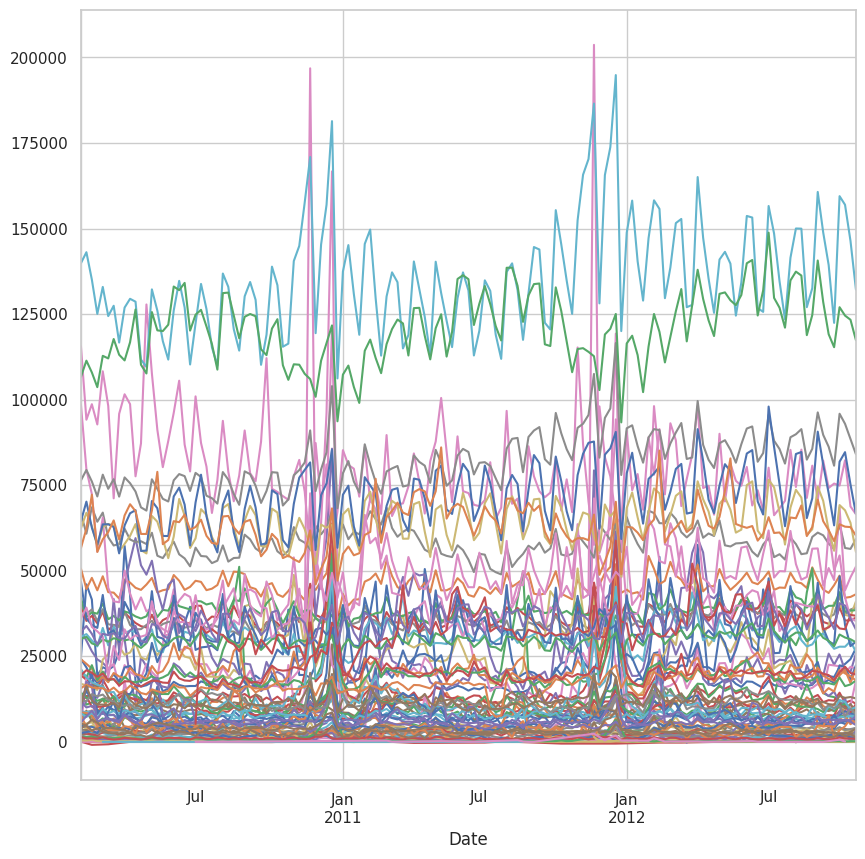

In [19]:
plt.figure(figsize=(10,10))
for i in ts.Dept.unique():
    ts_=ts[ts['Dept']==i]
    ts_['Weekly_Sales'].plot()

In [20]:
ts_1=ts[ts.Dept==1]

<Axes: xlabel='Date'>

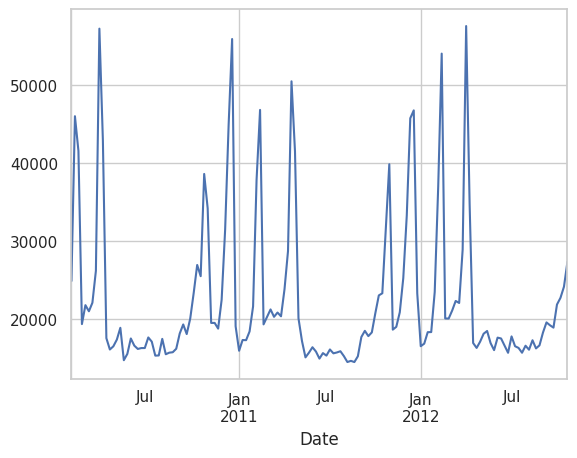

In [21]:
ts_1['Weekly_Sales'].plot()

In [22]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts_1['Weekly_Sales'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.522164
p-value                          0.110174
#lags Used                       6.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [23]:
monthly_sales_data = pd.pivot_table(ts_1, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2010,2011,2012
Month,,,
Jan,NaN,17286.6475,17551.3375
Feb,32990.7700,31440.6575,33670.8250
Mar,22809.2850,20705.8350,22936.1080
Apr,30103.3520,33011.3900,31400.0300
May,16673.5375,17062.9300,17698.2450
Jun,16685.1750,15744.6425,16729.3080
Jul,16383.0020,15771.2460,16617.1975
Aug,16144.7025,14765.4875,16609.1140
Sep,17978.3175,17551.2820,19034.4750


<Axes: xlabel='Month'>

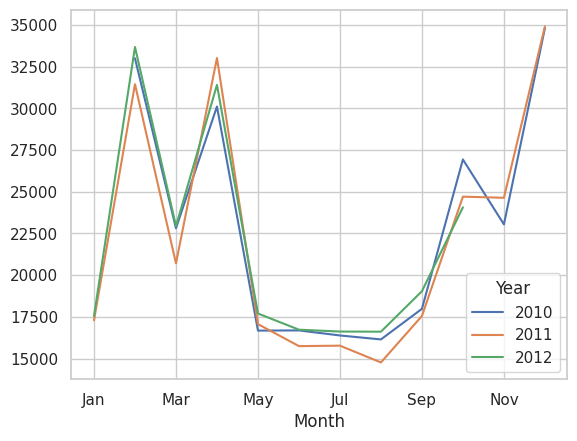

In [24]:
monthly_sales_data.plot()


In [25]:

yearly_sales_data = pd.pivot_table(ts_1, values = "Weekly_Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2010,NaN,32990.7700,22809.285,30103.352,16673.5375,16685.1750,16383.0020,16144.7025,17978.3175,26928.9060,23040.3500,34796.776
2011,17286.6475,31440.6575,20705.835,33011.390,17062.9300,15744.6425,15771.2460,14765.4875,17551.2820,24701.7075,24634.3775,34902.414
2012,17551.3375,33670.8250,22936.108,31400.030,17698.2450,16729.3080,16617.1975,16609.1140,19034.4750,24061.1400,NaN,NaN


<Axes: >

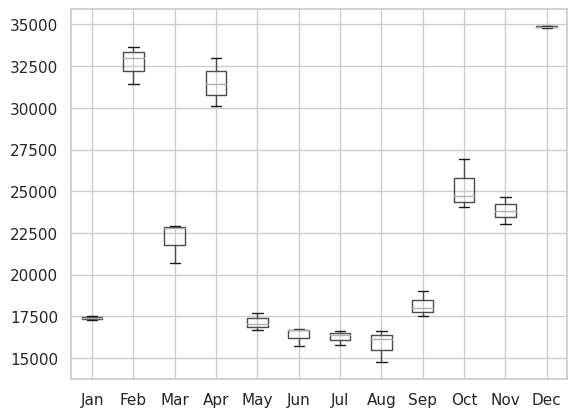

In [27]:
yearly_sales_data.boxplot()

In [28]:
decomposition = sm.tsa.seasonal_decompose(ts_1['Weekly_Sales'], model='multiplicative')

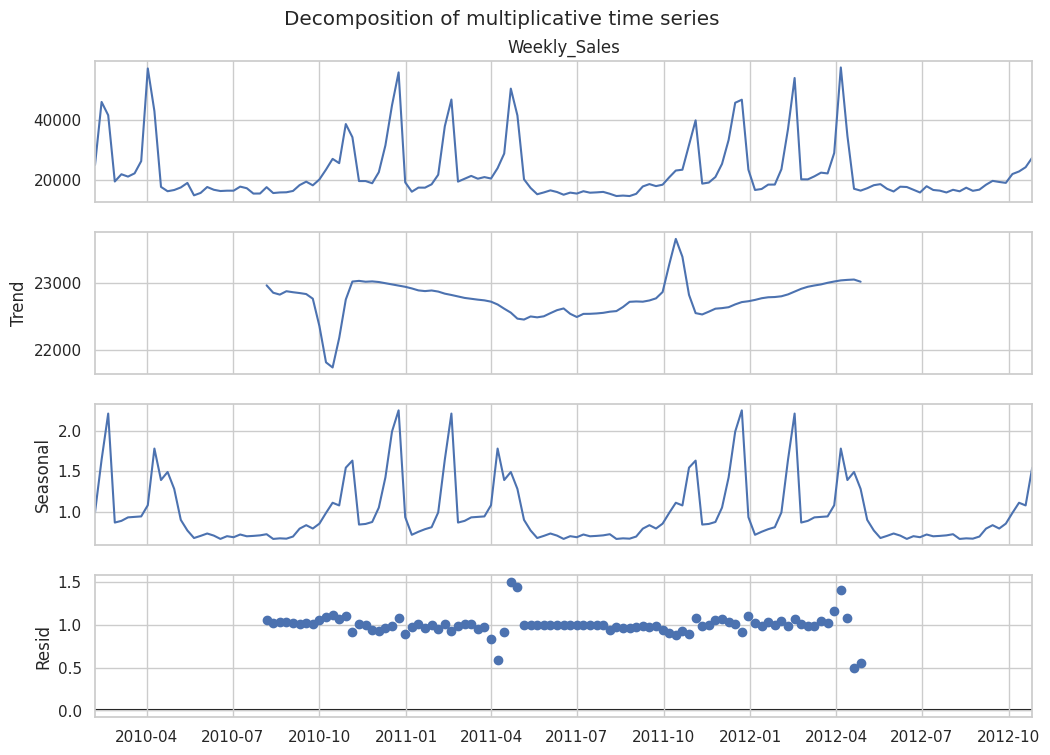

In [30]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

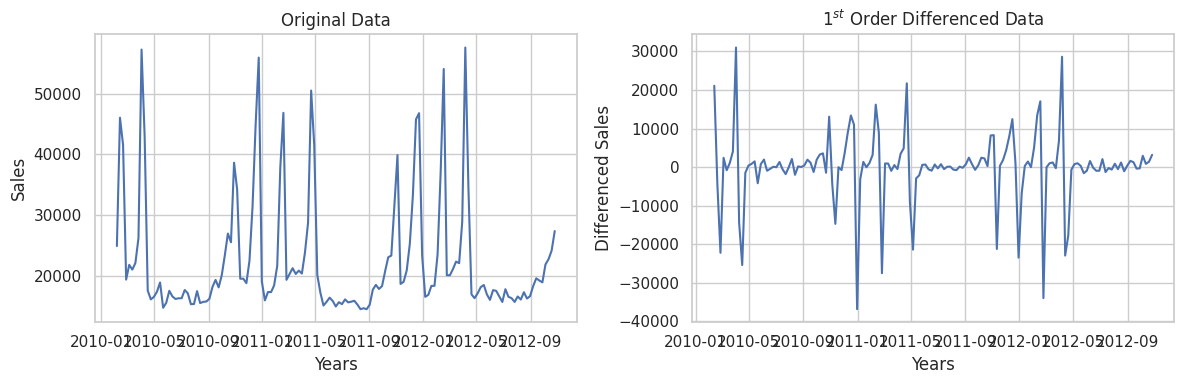

In [31]:

random_df=pd.DataFrame(ts_1['Weekly_Sales'])

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)

axes[0].plot(random_df.index, random_df['Weekly_Sales'])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Sales")
axes[0].set_title("Original Data")

axes[1].plot(random_df.index, random_df['Weekly_Sales'].diff(periods=1))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Differenced Sales")
axes[1].set_title("1$^{st}$ Order Differenced Data")

plt.tight_layout()
plt.show()

In [32]:

ts_log = np.log10(random_df)
ts_log.dropna(inplace=True)

ts_log_diff = ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
ts_log_diff.dropna(inplace=True)

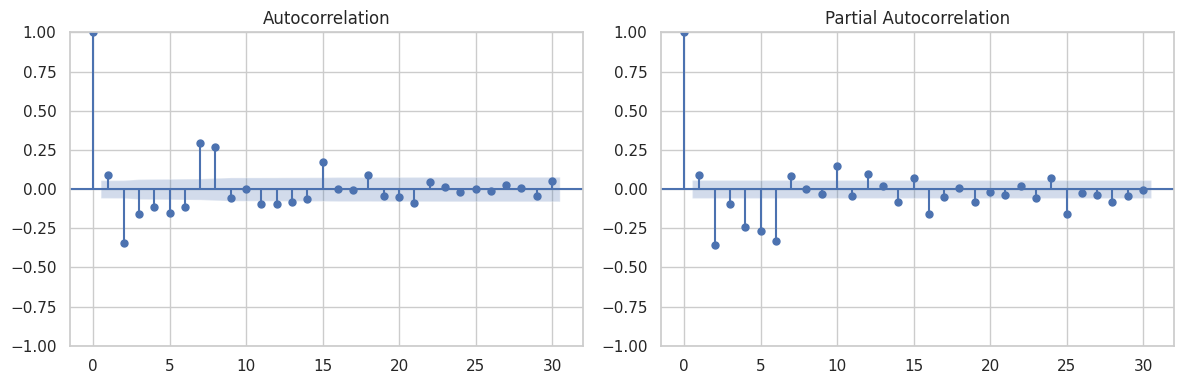

In [33]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [34]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [35]:
import warnings
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
            temp_model = sm.tsa.statespace.SARIMAX(ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 model - AIC:-196.93996833759442


In [36]:
best_model = sm.tsa.statespace.SARIMAX(ts_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [37]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 101.470
Date:                Mon, 24 Jun 2024   AIC                           -196.940
Time:                        11:48:45   BIC                           -188.072
Sample:                    02-05-2010   HQIC                          -193.337
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5068      0.165     -3.064      0.002      -0.831      -0.183
ma.L1          0.7436      0.134      5.564      0.000       0.482       1.006
sigma2         0.0140      0.001     13.990      0.0

In [38]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-06-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [39]:
ts_forecasted = pred_dynamic.predicted_mean
ts_truth = ts_log['2012-06-01':]

# Compute the mean square error
mse = ((ts_forecasted - ts_truth['Weekly_Sales']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 0.0053


In [40]:
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [41]:
n_steps = 36
idx = pd.date_range(ts_1.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]),
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]),
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2012-11-01,27758.132168,16271.115380,47354.707004,16271.115380,47354.707004
2012-12-01,27571.344280,11790.035534,64476.398160,11790.035534,64476.398160
2013-01-01,27665.859661,9797.938169,78118.454884,9797.938169,78118.454884
2013-02-01,27617.914341,8204.980668,92961.729389,8204.980668,92961.729389
2013-03-01,27642.204920,7098.046866,107648.132961,7098.046866,107648.132961


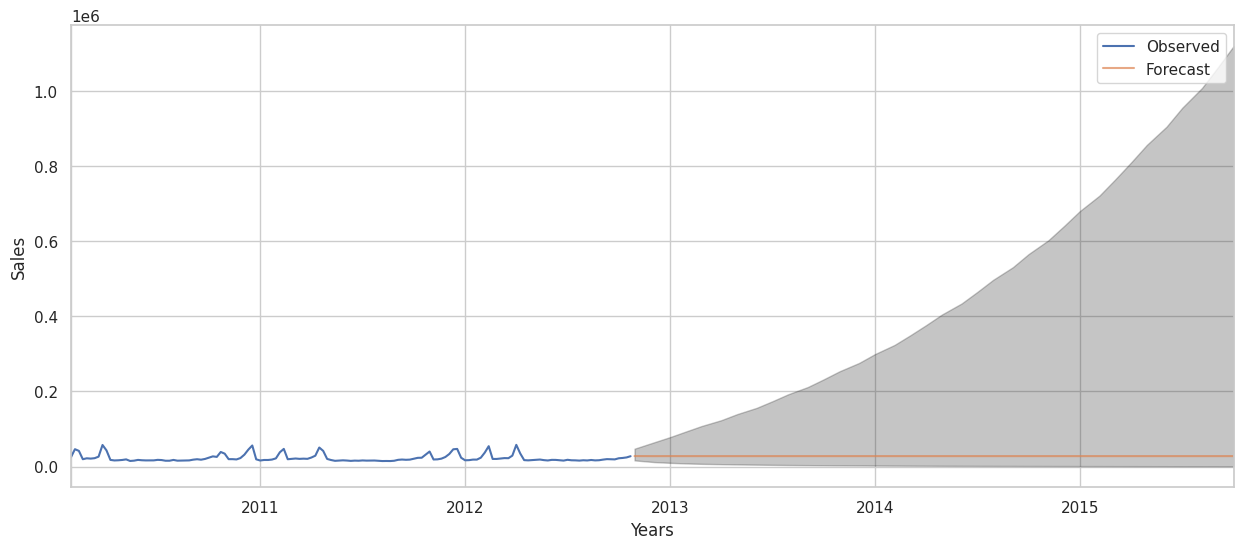

In [42]:

axis = ts_1['Weekly_Sales'].plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()